## Introduction:

Currently ongoing project to examine features that contribute to list price for properties for sale in Upstate New York.


In [2]:
import numpy as np
import pandas as pd
import random

### Data sources

Real estate listing I scraped from a popular website for rural properties, in particular undeveloped land parcels.

In [4]:
df = pd.read_csv('propertydata_b.csv', encoding='latin-1')
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

# Clean up data a little more
df['Price'] = df['Price'].str.replace("$","")
df['Price'] = df['Price'].str.replace(",","")
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

df['Parcel Size'] = df['Parcel Size'].str.replace("Acre","")
df['Parcel Size'] = df['Parcel Size'].str.replace("s","")
df['Parcel Size'] = pd.to_numeric(df['Parcel Size'],errors='coerce')

df['Latitude'] = pd.to_numeric(df['Latitude'],errors='coerce')
ind_lat = pd.isnull(df['Latitude']).nonzero()[0]
df.loc[ind_lat, 'Latitude'] = df['Latitude'].mean()
       
df['Longitude'] = pd.to_numeric(df['Longitude'],errors='coerce')
ind_lon = pd.isnull(df['Longitude']).nonzero()[0]
df.loc[ind_lon, 'Longitude'] = df['Longitude'].mean()

#df.dropna(axis=0, how='any',inplace=True)
print(df.shape)



(1086, 16)


In [5]:
import seaborn as sns

sns.regplot(x="Parcel Size", y="Price",
            data=df.loc[df['Property type'] == 'Land'], fit_reg=True)

sns.regplot(x="Parcel Size", y="Price",
            data=df.loc[df['Property type'] == 'House'], fit_reg=False)

sns.regplot(x="Parcel Size", y="Price",
            data=df.loc[df['Property type'] == 'Farms and Ranches'], fit_reg=False)


/Users/amandakinnischtzke/miniconda3/envs/insight4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [6]:
# import the library
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = df#.iloc[0:10,:]
data.dropna(axis=0, subset=['Latitude','Longitude','Price'], inplace=True)

# Make an empty map
m = folium.Map(location=[45,-73], 
               #tiles="Mapbox Bright", 
               zoom_start=8)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['Latitude'], data.iloc[i]['Longitude']],
      popup=data.iloc[i]['Title'],#.astype(str),
      radius=data.iloc[i]['Price']/10,
      color=None, #'crimson',
      fill=True,
      fill_color='blue'
   ).add_to(m)
    
m

### Mapping property locations

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "folium_image.png")



## Build model

- primary goal is to understand the important features for determining the sale price



In [92]:
def unique_list(data):

    import re
                    
    if not None:
        activities = ",".join(data)
        activities = activities.replace("[",",")
        activities = activities.replace("]",",")
        activities = activities.replace("'","")
        activities = activities.replace('"',"")
        activities = activities.replace(",,",",")
        activities = activities.replace(" ","")

        #words = re.findall(',', activities.lower())
        words = activities.split(',')
        activities_list = set(words)
    
        activities_list = list(activities_list)
        if activities_list[0] == '':
            activities_list.remove('')

    else:
        activities_list=[]
        
    return activities_list



In [93]:
def make_dummies(category): #, category_list):

    category_list = unique_list(df[category])

    cols = ["{}_{}".format(category,a) for a in category_list]
    
    for i in range(len(cols)):
        df_new[cols[i]] = 0    
        df_new.loc[df_new[category].str.replace(" ","").str.contains(category_list[i]) == True, cols[i]] = 1

    
    
    

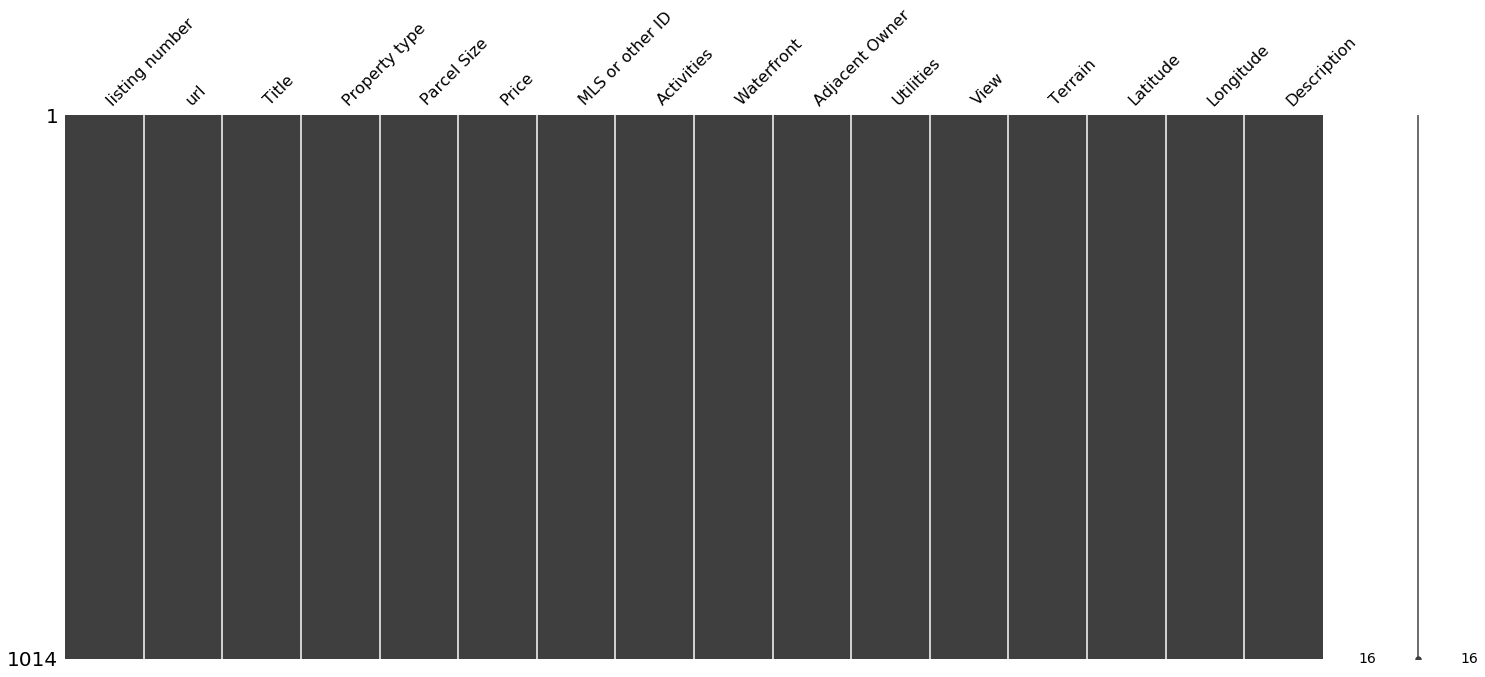

In [94]:
import missingno as msno

msno.matrix(df) # check that we've removed all Nans

In [168]:
df_new = df.copy()
print(df_new.shape)
df_new.drop(labels=df_new.loc[df_new['Price'] > 50001].index, axis=0, inplace=True)
#df_new.drop(labels=df_new.loc[df_new['Property type'] != 'Land'].index, axis=0, inplace=True)
#df_new.drop(labels=df_new.loc[df_new['Parcel Size'] >= 3].index, axis=0, inplace=True)

print(df_new.shape)


(1014, 16)
(951, 16)


### Finish data cleaning

In [169]:
global df_new


make_dummies("Activities") #, activities_list)
make_dummies("View") #, view_list)
make_dummies("Adjacent Owner")
make_dummies("Terrain")
make_dummies("Utilities")
make_dummies("Waterfront")
make_dummies("Property type")

print(df_new.shape) 


(951, 64)


In [170]:
df_new.head()

,listing number,url,Title,Property type,Parcel Size,Price,MLS or other ID,Activities,Waterfront,Adjacent Owner,...,Utilities_Available,Waterfront_River,Waterfront_None,Waterfront_Pond,Waterfront_Creek,Waterfront_other,Waterfront_Lake,Property type_House,Property type_Land,Property type_FarmsandRanches
0,25062281,http://www.landwatch.com/pid/25062281,"Osceola, Lewis County, NY Land For Sale - 5 Acres",Land,5.00,19995.0,Osceola Wright lot 13,"['Boating', 'Camping', 'Family', 'Fine Dining'...",[],['Private'],...,1,0,0,0,0,0,0,0,1,0
1,331752147,http://www.landwatch.com/pid/331752147,"Altmar, Oswego County, NY Land For Sale - 5.01...",Land,5.01,19900.0,PB4,"['Camping', 'Canoeing/Kayaking', 'Conservation...",['Creek'],[],...,1,0,0,0,1,0,0,0,1,0
2,332164401,http://www.landwatch.com/pid/332164401,"Williamstown, Oswego County, NY Land For Sale ...",Land,3.50,28995.0,Williamstown Allen lot 5,"['Biking', 'Boating', 'Camping', 'Canoeing/Kay...",['River'],['Private'],...,0,1,0,0,0,0,0,0,1,0
3,352009085,http://www.landwatch.com/pid/352009085,"Glenfield, Lewis County, NY Land For Sale - 12...",Land,12.33,24600.0,NY223575,"['Boating', 'Canoeing/Kayaking', 'Fishing', 'H...",[],[],...,1,0,0,0,0,0,0,0,1,0
4,25071515,http://www.landwatch.com/pid/25071515,"Altmar, Oswego County, NY Land For Sale - 5.3 ...",Land,5.30,22900.0,SLPVRD7,"['Boating', 'Camping', 'Canoeing/Kayaking', 'F...",['Lake'],[],...,1,0,0,0,0,0,1,0,1,0


### Brief data exploration 


(951, 24)


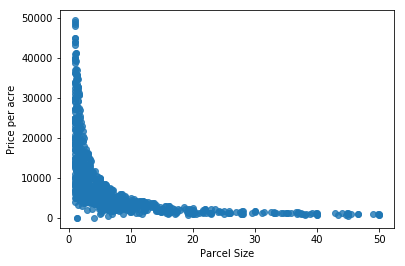

In [218]:
df_new['Price per acre'] = df_new['Price']/df_new['Parcel Size']
df_new['Activities_Sailing']

features = df_new.drop(labels=['listing number','url','Price per acre','Parcel Size','Title','Property type','Price',
                               'MLS or other ID','Description','Activities','Waterfront',
                               'Adjacent Owner','Utilities','View','Terrain', 'Property type_House',
                              'Activities_Sailing','Activities_Tennis','Activities_ORV/ATV',
                              'Activities_Snowmobiling','Activities_RVing','Activities_Family',
                              'Activities_Biking','Activities_Fishing','Activities_HorsebackRiding',
                              'Activities_Boating','Activities_Skiing','Activities_Camping',
                              'Activities_Golfing','Activities_Hiking','View_Trees','Activities_Hunting',
                              ], 
                       axis=1)

feature_list = features.columns

# Drop categorical columns that only have a '1' fewer than 5 times
weak_cols = feature_list[pd.to_numeric(features.sum().values, 'coerce') < 5][1:]
features.drop(weak_cols, axis=1, inplace=True)
feature_list = features.columns
print(features.shape)
labels = df_new['Price per acre']
sns.regplot(x="Parcel Size", y = "Price per acre", data=df_new, fit_reg=False)


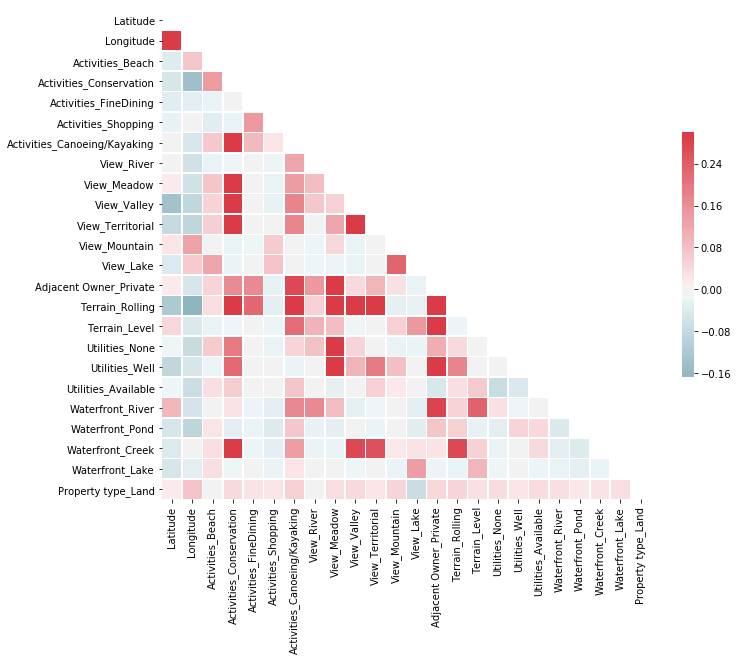

In [219]:
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Build random forest regression model to predict listing price



In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import sklearn.datasets
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# Using Scikit-learn to split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# specify parameters and distributions to sample from
param_dist = {"n_estimators": [10, 100],
              "max_depth": [3, len(feature_list)],
              "max_features": sp_randint(1, len(feature_list)),
              "min_samples_split": sp_randint(2, len(feature_list)),
              "min_samples_leaf": sp_randint(1, len(feature_list)),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# run randomized search
n_iter_search = 100

# Running a random forest model
rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, 
                                   cv = 3,
                                   verbose=1)

random_search.fit(x_train, y_train); 


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.3min finished


In [221]:

params = random_search.best_params_
#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=params['n_estimators'],
                           max_depth=params['max_depth'],
                           max_features=params['max_features'],
                           min_samples_split=params['min_samples_split'],
                           min_samples_leaf=params['min_samples_leaf'],
                           bootstrap=params['bootstrap'],
                           criterion=params['criterion'],
                          )

rf.fit(x_train, y_train)

predictions = rf.predict(x_test) 
errors_MAE = (abs(predictions - y_test)) # Calculate the absolute errors
errors_MPE = (abs(predictions - y_test))/y_test # Calculate the absolute errors
errors_MPE[errors_MPE > 5000] = 1

print("Avg error: ", abs(predictions - y_test).mean())#"%0.2f (+/- %0.2f)" % errors_MAE.mean())
print("Avg % error: ", errors_MPE.mean())#"%0.2f (+/- %0.2f)" % errors_MAE.mean())



Avg error:  6123.78103586504
Avg % error:  1.2638468042646587


(0, 37000)

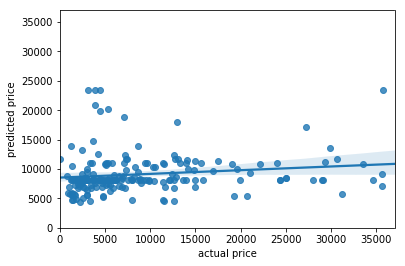

In [237]:
g = sns.regplot(x=y_test, y=predictions)
g.set_xlabel("actual price")
g.set_ylabel("predicted price")
#plt.axis('equal')
g.set_ylim(0, 37000)
g.set_xlim(0, 37000)


Text(0,0.5,'abs error')

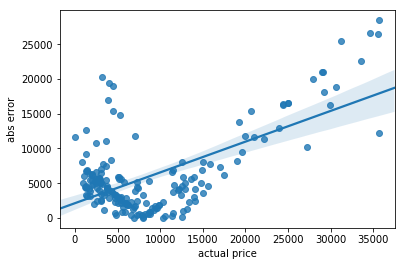

In [232]:
import matplotlib.pyplot as plt
g = sns.regplot(x=y_test, y=errors_MAE)#y=predictions - y_test)
g.set_xlabel("actual price")
#g.set_ylabel("predicted - actual price")
g.set_ylabel("abs error")


Text(0,0.5,'% error')

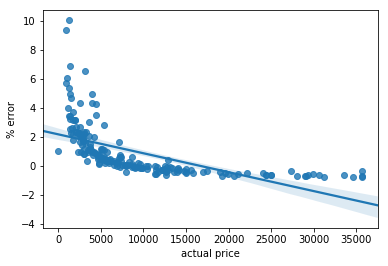

In [238]:
error = (predictions - y_test)/y_test
error[error > 5000] = 1

g = sns.regplot(x=y_test, y=error)#y=predictions - y_test)
g.set_xlabel("actual price")
#g.set_ylabel("predicted - actual price")
g.set_ylabel("% error")


In [224]:
top_features = pd.DataFrame({'feature': feature_list,
                         'importance': rf.feature_importances_})
top_features.sort_values(by='importance', ascending=False, inplace=True)
top_features.reset_index(drop=True, inplace=True)
top_features.head(10)

,feature,importance
0,Property type_Land,0.491919
1,Latitude,0.260014
2,Longitude,0.154104
3,Activities_Beach,0.049175
4,Utilities_Available,0.037405
5,Terrain_Rolling,0.002737
6,Waterfront_Pond,0.001628
7,Activities_Canoeing/Kayaking,0.001228
8,View_Valley,0.001133
9,Activities_Conservation,0.000339


### Use LIME to get a more quantitative understanding of how features influence price

In [225]:

def setcolor(x):
    if x >=0:
        return "#9d667b"
    else:
        return "#6588a7"
    
def addname(x):
    for f in feature_list: #df_features['name']:
        if f in x:
            return f
        

def calc_lime(explainer, x):
    
    
    exp = explainer.explain_instance(x, rf.predict, num_features=10)

    df_lime = pd.DataFrame(exp.as_list())

    df_lime = pd.DataFrame(exp.as_list())
    df_lime.columns = ['feature level','value']
    df_lime.sort_values('value',ascending=True,inplace=True)
    df_lime['instance'] = i    
    df_lime['bar color'] = df_lime.apply(lambda row: setcolor(row['value']), axis=1)
    df_lime['feature name'] = df_lime.apply(lambda row: addname(row['feature level']), axis=1)

    return df_lime



In [226]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train), 
                                                   feature_names=feature_list, 
                                                   class_names='price', 
                                                   discretize_continuous=True,
                                                   verbose=False, 
                                                   mode='regression'
                                                  )

df_all = pd.DataFrame(columns=['feature level', 'value', 'instance', 'bar color', 'feature name'])
i=0

for x in np.array(x_test):
    
    df_instance = calc_lime(explainer, x)
    
    df_all = pd.concat([df_all, df_instance], axis=0)
    print(i)
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


(36.5, -0.5)

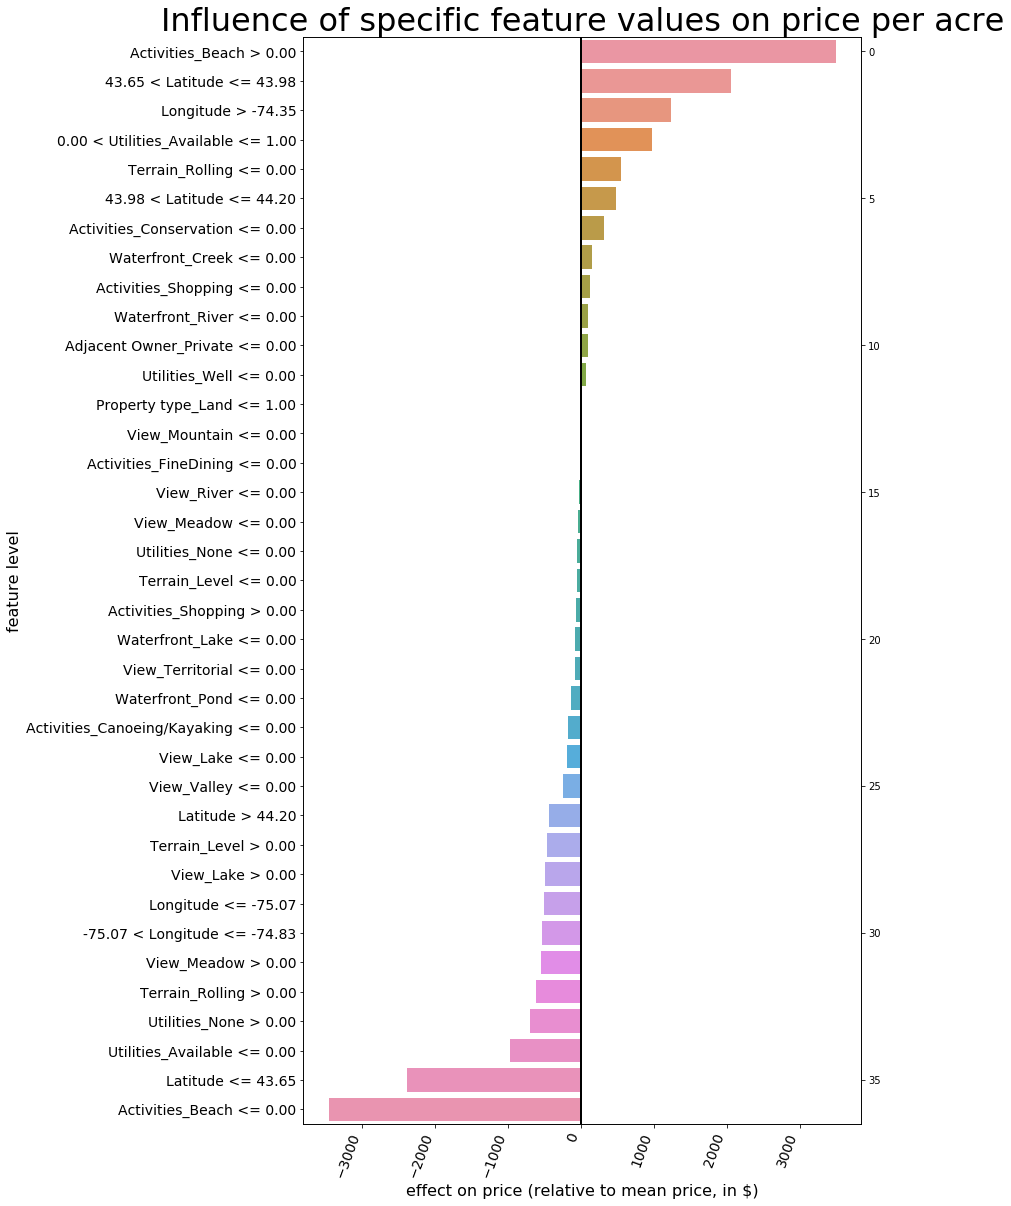

In [227]:
price_affect = df_all.groupby('feature level').mean()
price_affect.sort_values('value', ascending=False, inplace=True)
price_affect.reset_index(inplace=True)

plt.figure(figsize=(10,20))

sns.barplot(x="value", y="feature level", data=price_affect)
plt.xticks(rotation=70,
           horizontalalignment="right",
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("effect on price (relative to mean price, in $)", fontsize=16)
plt.ylabel("feature level", fontsize=16)
plt.title("Influence of specific feature values on price per acre", fontsize=32)

#xmin, xmax = xlim() 
ymin,ymax = plt.ylim() 
y = np.linspace(ymin, ymax)
x = [0 for i in range(0,len(y))]
axes2 = plt.twinx()
axes2.plot(x, y, color='k', linewidth=2)
axes2.set_ylim(ymin, ymax)
